In [68]:
import json
import numpy as np
import pandas as pd
import missingno
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier # for training the algorithm
from sklearn.ensemble import ExtraTreesClassifier # for training the algorithm
import joblib 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [62]:

'''#url for covidTracking data API
url = "https://api.covidtracking.com/v1/states/daily.csv"

#load into dataframe
df = pd.read_csv(url)

print("Shape of data : ",df.shape)
df.head()'''
# load dataset
df = pd.read_csv('https://raw.githubusercontent.com/pplonski/datasets-for-start/master/adult/data.csv', skipinitialspace=True)
x_cols = [c for c in df.columns if c != 'income']
# set input matrix and target column
X = df[x_cols]
y = df['income']
# show first rows of data
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1234)


In [73]:
dict(X_train.mode().iloc[0])

{'age': 31.0,
 'workclass': 3.0,
 'fnlwgt': 121124.0,
 'education': 11.0,
 'education-num': 9.0,
 'marital-status': 2.0,
 'occupation': 9.0,
 'relationship': 0.0,
 'race': 4.0,
 'sex': 1.0,
 'capital-gain': 0.0,
 'capital-loss': 0.0,
 'hours-per-week': 40.0,
 'native-country': 37.0}

In [65]:
train_mode = dict(X_train.mode().iloc[0])
X_train = X_train.fillna(train_mode)
print(train_mode)

{'age': 31.0, 'workclass': 'Private', 'fnlwgt': 121124, 'education': 'HS-grad', 'education-num': 9.0, 'marital-status': 'Married-civ-spouse', 'occupation': 'Prof-specialty', 'relationship': 'Husband', 'race': 'White', 'sex': 'Male', 'capital-gain': 0.0, 'capital-loss': 0.0, 'hours-per-week': 40.0, 'native-country': 'United-States'}


In [66]:
# convert categoricals
encoders = {}
for column in ['workclass', 'education', 'marital-status',
                'occupation', 'relationship', 'race',
                'sex','native-country']:
    categorical_convert = LabelEncoder()
    X_train[column] = categorical_convert.fit_transform(X_train[column])
    encoders[column] = categorical_convert

In [69]:
# train the Random Forest algorithm
rf = RandomForestClassifier(n_estimators = 100)
rf = rf.fit(X_train, y_train)

In [70]:
et = ExtraTreesClassifier(n_estimators = 100)
et = et.fit(X_train, y_train)

In [71]:
joblib.dump(train_mode, "./train_mode.joblib", compress=True)
joblib.dump(encoders, "./encoders.joblib", compress=True)
joblib.dump(rf, "./random_forest.joblib", compress=True)
joblib.dump(et, "./extra_trees.joblib", compress=True)

['./extra_trees.joblib']

# Lets try to find the US state with the next highest positive increase 

In [19]:
target = 'positiveIncrease'
prob_features = ['date', 'state', 'positive', 'probableCases', 'negative', 'pending',
       'totalTestResultsSource', 'totalTestResults', 'hospitalizedCurrently',
       'inIcuCurrently', 
       'onVentilatorCurrently', 'recovered',
       'death', 'hospitalized', 
       'deathConfirmed', 
       'positiveTestsAntigen', 'fips', 
       'negativeIncrease']
df[prob_features].head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,recovered,death,hospitalized,deathConfirmed,positiveTestsAntigen,fips,negativeIncrease
0,20210130,AK,52470.0,NaN,NaN,NaN,totalTestsViral,1495885.0,39.0,NaN,10.0,NaN,262.0,1205.0,NaN,NaN,2,0
1,20210130,AL,455582.0,96227.0,1767953.0,NaN,totalTestsPeopleViral,2127308.0,1879.0,NaN,NaN,242143.0,7566.0,41859.0,6094.0,NaN,1,0
2,20210130,AR,294387.0,59482.0,2185289.0,NaN,totalTestsViral,2420194.0,911.0,280.0,146.0,271911.0,4838.0,13599.0,3896.0,NaN,5,11145
3,20210130,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,60,0
4,20210130,AZ,753379.0,47715.0,2734463.0,NaN,totalTestsViral,6643932.0,3828.0,984.0,645.0,102678.0,13098.0,52006.0,11682.0,NaN,4,12170


<AxesSubplot:>

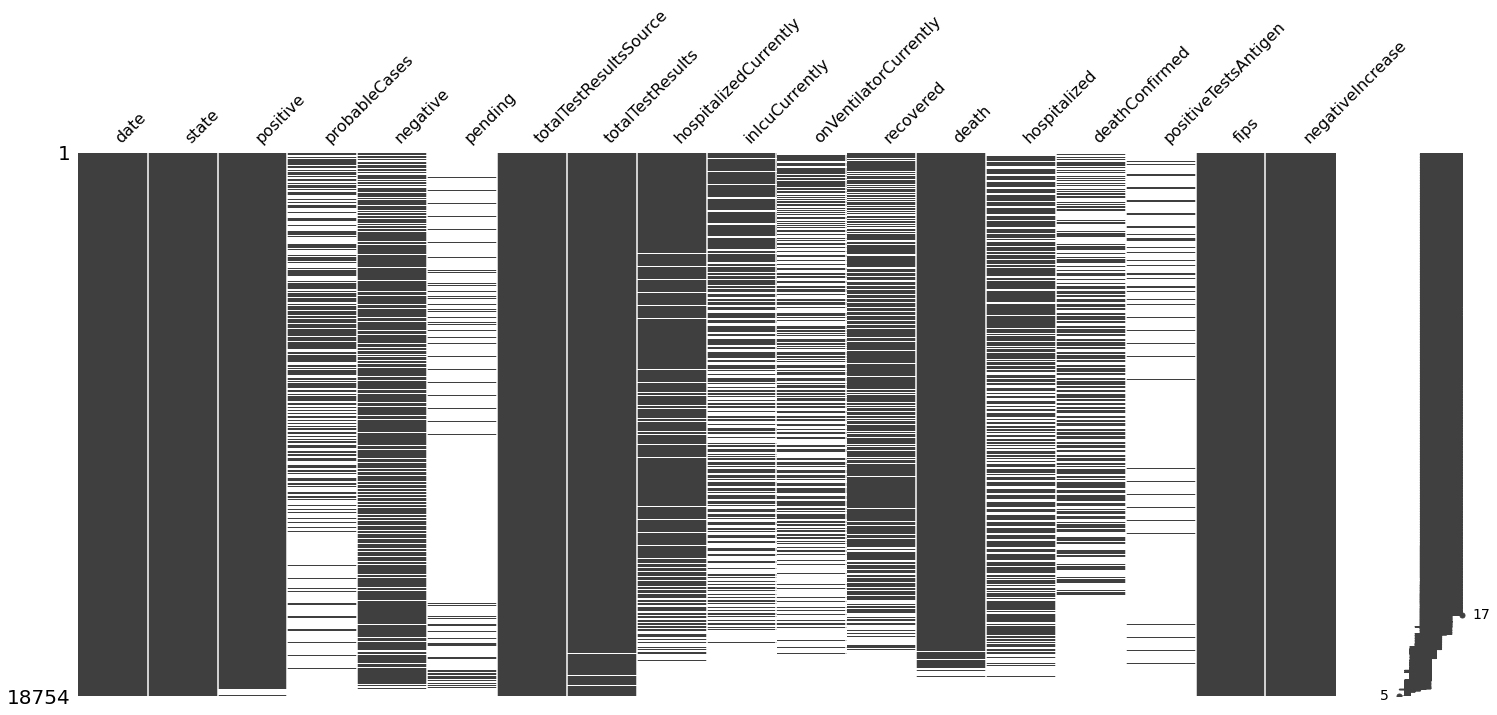

In [12]:
missingno.matrix(df[prob_features])

In [24]:
#removing features with insifficient data
remove_features = ['probableCases','pending', 'onVentilatorCurrently','positiveTestsAntigen','deathConfirmed']
prob_features = [feature for feature in prob_features if feature not in remove_features ]
print("Number of Features : ",len(prob_features))

Number of Features :  13


In [57]:
#grouped rows based on date
df_grouped = df[prob_features+[target]].groupby('date')

#let's check out 2021-01-27 and 2021-01-07
day27 = df_grouped.get_group(20210127)
day7 = df_grouped.get_group(20210107)

print("Rows in Day 7 = {}, rows in Day 27 = {}".format(day7.shape[0], day27.shape[0]))

Rows in Day 7 = 56, rows in Day 27 = 56


In [60]:
plt.plot(day7[prob_features-['STATE']],day7[target])

TypeError: unsupported operand type(s) for -: 'list' and 'list'